In [0]:
import cv2
import numpy as np

In [0]:
def preprocessimage(img):
  processed = cv2.GaussianBlur(img,(9,9),0)
  processed = cv2.adaptiveThreshold(processed,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  processed = cv2.bitwise_not(processed)
  kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]])
  #processed = cv2.dilate(processed,kernel)
  return processed
  

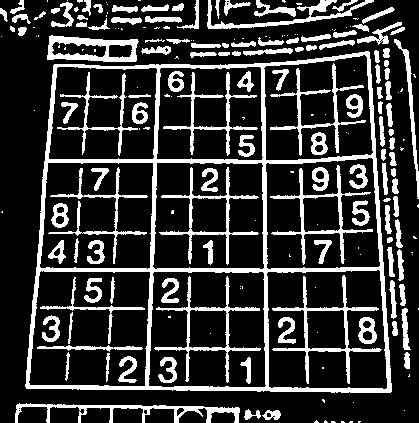

In [19]:
from google.colab.patches import cv2_imshow
img = cv2.imread('sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
processed_image = preprocessimage(img)
cv2_imshow(processed_image)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sudoku.jpeg to sudoku.jpeg
